<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Stroke_(by_NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('stroke.csv')

In [5]:
x = df.drop("stroke" , axis=1)
y =df['stroke']

In [6]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size=0.2 , random_state=40)
xtest , xvalid , ytest , yvalid = train_test_split(xtest , ytest , test_size=0.5 , random_state=40)

In [8]:
import tensorflow as tf
import keras

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , activation='relu' , input_shape=xtrain.shape[1:]),
    tf.keras.layers.Dense(32 , activation='relu'),
    tf.keras.layers.Dense(16 , activation='relu'),
    tf.keras.layers.Dense(8 , activation='relu'),
    tf.keras.layers.Dense(1 , activation='sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,005 (19.55 KB)

 Trainable params: 5,005 (19.55 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics=['acc'])

In [13]:
h = model.fit(xtrain, ytrain , epochs=100 , validation_split=0.1,validation_batch_size=32 , batch_size=32 ,  verbose=1)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6642 - loss: 0.6201 - val_acc: 0.7828 - val_loss: 0.4805
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7940 - loss: 0.4440 - val_acc: 0.8162 - val_loss: 0.4187
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8043 - loss: 0.4344 - val_acc: 0.8188 - val_loss: 0.4090
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7984 - loss: 0.4317 - val_acc: 0.8265 - val_loss: 0.4123
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8011 - loss: 0.4172 - val_acc: 0.7982 - val_loss: 0.4424
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8173 - loss: 0.4128 - val_acc: 0.8355 - val_loss: 0.3856
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8270 - loss: 0.3907 - val_acc: 0.8406 - val_loss: 0.3779
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8222 - loss: 0.3940 - val_acc: 0.8380 - val_loss: 0.3774
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [16]:
epoch = len(h.history['loss'])

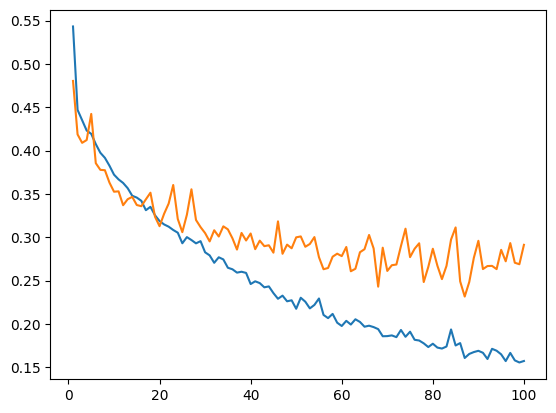

In [18]:
plt.plot(range(1 , epoch+1) , h.history['loss'] , label='training')
plt.plot(range(1 , epoch+1) , h.history['val_loss'] , label='validation')

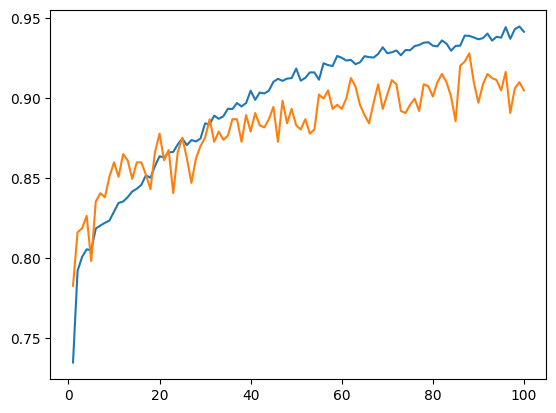

In [19]:
plt.plot(range(1 , epoch+1) , h.history['acc'] , label='training')
plt.plot(range(1 , epoch+1) , h.history['val_acc'] , label='validation')

In [20]:
yp = model.predict(xtest)
yp = yp.round()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [21]:
from sklearn.metrics import classification_report

print(classification_report(ytest , yp))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       451
           1       0.89      0.98      0.93       521

    accuracy                           0.92       972
   macro avg       0.93      0.92      0.92       972
weighted avg       0.93      0.92      0.92       972

